In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import koreanize_matplotlib

In [89]:
df = pd.read_csv('../datasets/KOPIS/performance_cleaned.csv')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5268\3588166224.py:1: DtypeWarning: Columns (29,31,32,33,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../datasets/KOPIS/performance_cleaned.csv')


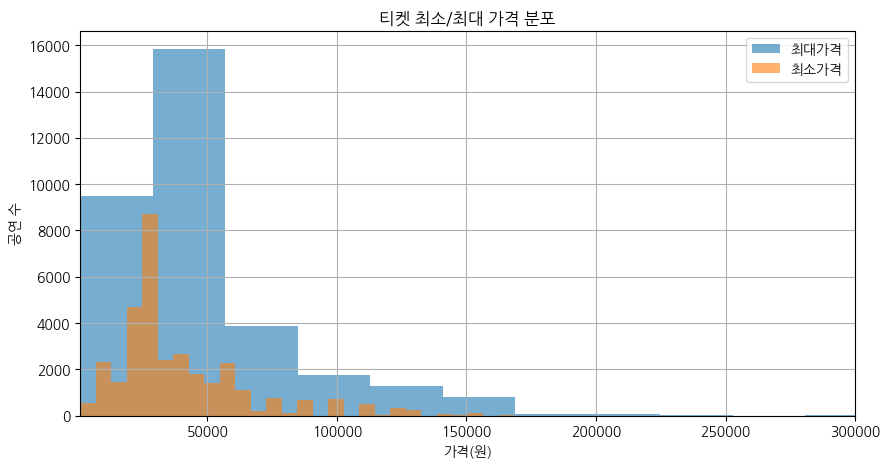

In [100]:
plt.figure(figsize=(10,5))
df['최대가격'].hist(bins=50, alpha=0.6, label="최대가격")
df['최소가격'].hist(bins=50, alpha=0.6, label="최소가격")
plt.legend()
plt.title("티켓 최소/최대 가격 분포")
plt.xlim(1000, 300000)
plt.xlabel("가격(원)")
plt.ylabel("공연 수")
plt.show()

In [101]:
df['공연시작연도'] = pd.to_datetime(
    df['공연시작일'], errors='coerce'
).dt.year

In [104]:
# 2014년 이전 공연은 모두 2014년으로 치환
df.loc[df['공연시작연도'] < 2014, '공연시작연도'] = 2014

In [105]:
yearly_price = df.groupby('공연시작연도')[['최소가격', '최대가격']].mean()

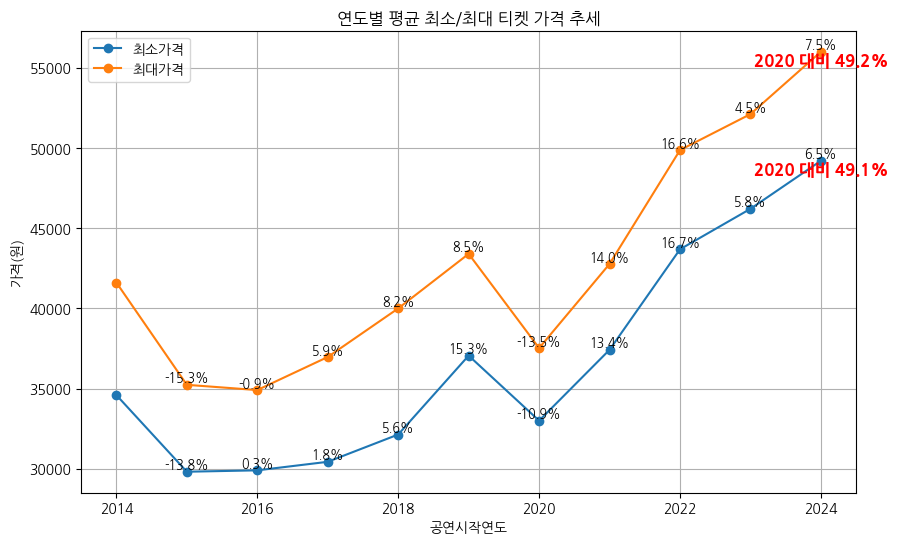

In [122]:
yearly_price.plot(marker='o', figsize=(10,6))
plt.title("연도별 평균 최소/최대 티켓 가격 추세")

# 전년 대비 증감률
for col in ['최소가격', '최대가격']:
    pct_change = yearly_price[col].pct_change() * 100
    for x, y, p in zip(yearly_price.index, yearly_price[col], pct_change):
        if pd.notna(p):
            plt.text(x, y, f"{p:.1f}%", ha='center', va='bottom', fontsize=9, color="black")

# 2020 → 2024 증감률 계산 (코로나 이후)
for col in ['최소가격','최대가격']:
    if 2014 in yearly_price.index and 2024 in yearly_price.index:
        base = yearly_price.loc[2020, col]
        now = yearly_price.loc[2024, col]
        change = ((now - base) / base) * 100
        x, y = 2024, now
        plt.text(x, y, f"2020 대비 {change:.1f}%", ha='center', va='top',
                 fontsize=12, color='red', fontweight='bold')
        
plt.ylabel("가격(원)")
plt.grid(True)
plt.show()

In [129]:
df[df['공연장르명'] == '뮤지컬']['최대가격'].value_counts()

최대가격
30000.0     1246
40000.0      965
20000.0      930
50000.0      830
66000.0      620
            ... 
21900.0        1
250000.0       1
15900.0        1
14900.0        1
198000.0       1
Name: count, Length: 104, dtype: int64

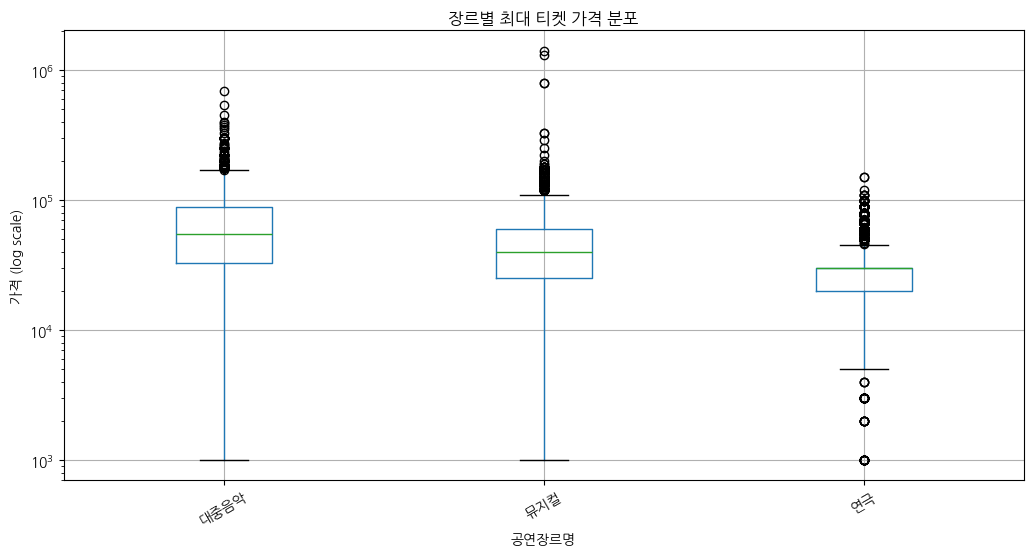

In [ ]:
# 장르별 최대 티켓 가격 분포

df.boxplot(column="최대가격", by="공연장르명", figsize=(12, 6))
plt.title("장르별 최대 티켓 가격 분포")
plt.suptitle("")
plt.ylabel("가격 (log scale)")
plt.yscale('log')
plt.xticks(rotation=30)
plt.show()

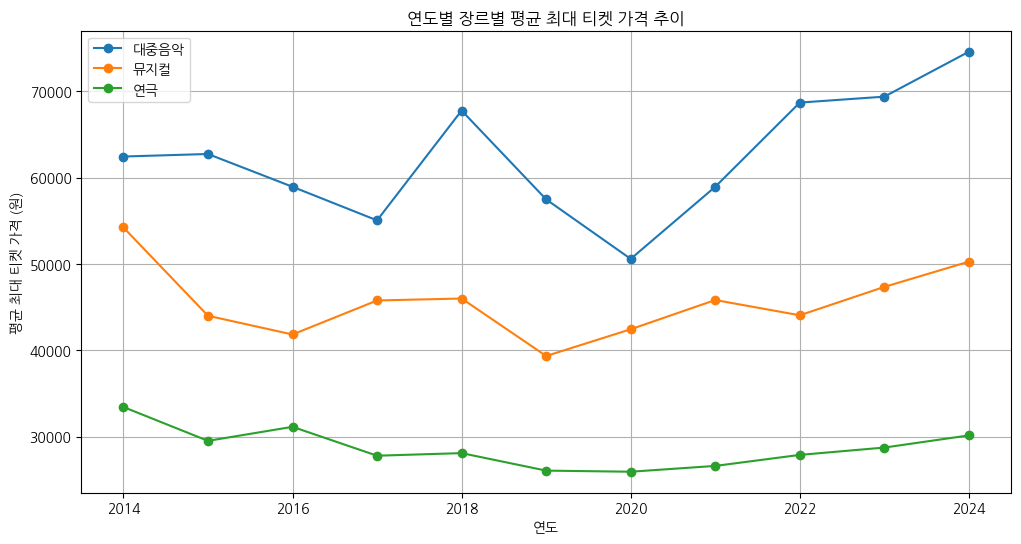

In [132]:
# 연도별 × 장르별 평균 최대가격
genre_year = (
    df.groupby(['공연시작연도','공연장르명'])['최대가격']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,6))
for genre in genre_year['공연장르명'].unique():
    data = genre_year[genre_year['공연장르명'] == genre]
    plt.plot(data['공연시작연도'], data['최대가격'], marker='o', label=genre)

plt.title("연도별 장르별 평균 최대 티켓 가격 추이")
plt.xlabel("연도")
plt.ylabel("평균 최대 티켓 가격 (원)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df[df['공연장르명'] == '뮤지컬']

Index(['공연ID', '공연명', '공연시작일', '공연종료일', '공연시설명', '출연진', '제작진', '런타임', '관람연령',
       '제작사', '기획사', '주최', '주관', '티켓가격', '포스터URL', '줄거리', '공연지역', '공연장르명',
       '오픈런', '내한여부', '아동공연여부', '대학로공연여부', '축제여부', '뮤지컬라이센스', '뮤지컬창작', '최종수정일',
       '공연상태', '공연시설ID', '공연시간', '장르(통계)', '상연횟수', '공연명(통계)', '공연시설명(통계)',
       '공연시작일(통계)', '공연종료일(통계)', '연도(통계)', '월(통계)', '장르코드(통계)', '티켓가격_list',
       '최소가격', '최대가격', '공연시작연도'],
      dtype='object')

In [135]:
def categorize_musical(row):
    if row['뮤지컬라이센스'] == 'Y':
        return "대형 라이선스 뮤지컬"
    elif row['뮤지컬창작'] == 'Y' and row['대학로공연여부'] == 'N':
        return "창작 뮤지컬(중대형)"
    elif row['뮤지컬창작'] == 'Y' and row['대학로공연여부'] == 'Y':
        return "창작 뮤지컬(대학로)"
    else:
        return "기타 뮤지컬"

df['뮤지컬_구분'] = df.apply(categorize_musical, axis=1)

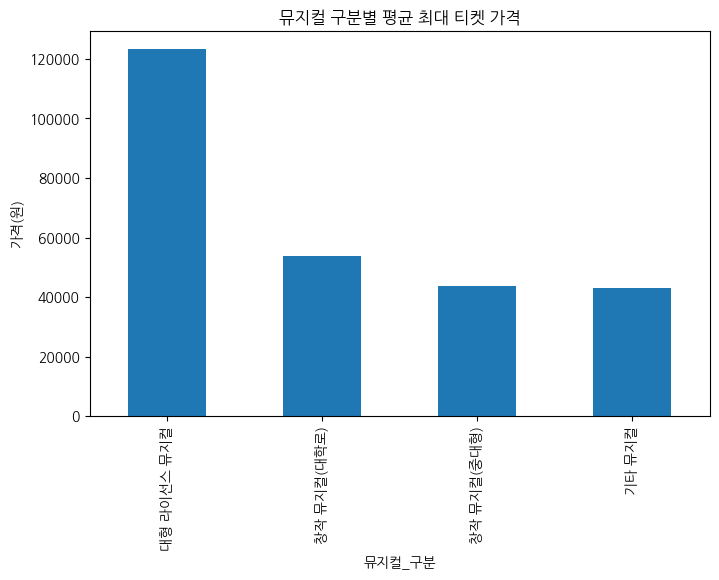

In [137]:
# 뮤지컬만 추출
musicals = df[df['공연장르명'] == '뮤지컬']

# 그룹별 평균 가격
group_price = musicals.groupby('뮤지컬_구분')[['최소가격','최대가격']].mean()
group_price_sorted = group_price.sort_values("최대가격", ascending=False)

# 시각화
group_price_sorted['최대가격'].plot(kind='bar', figsize=(8,5), title="뮤지컬 구분별 평균 최대 티켓 가격")
plt.ylabel("가격(원)")
plt.show()


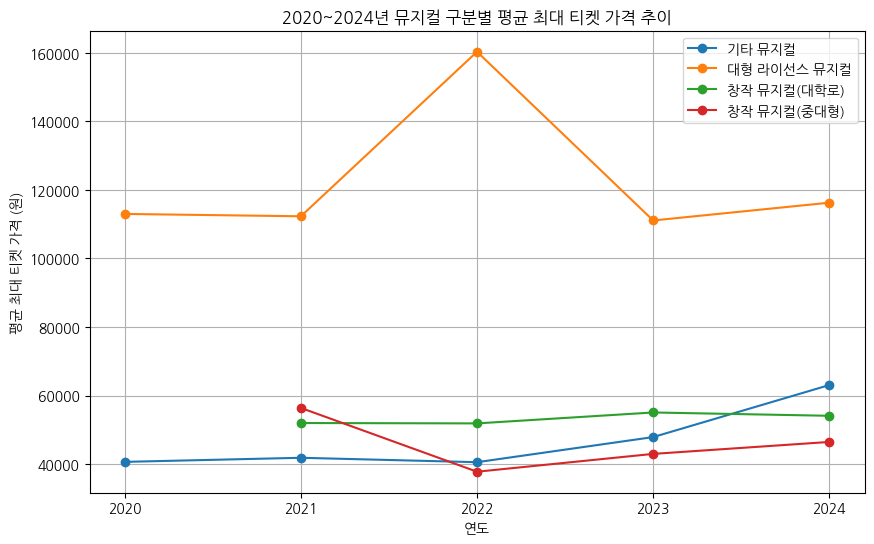

In [ ]:
# 2020년~2024년만 추출
musicals = df[(df['공연장르명'] == '뮤지컬') &
                    (df['공연시작연도'].between(2020, 2024))]

# 연도별 × 구분별 평균 최대가격
trend = (
    musicals.groupby(['공연시작연도','뮤지컬_구분'])['최대가격']
    .mean()
    .reset_index()
)

trend['공연시작연도'] = trend['공연시작연도'].astype(int).astype(str)

plt.figure(figsize=(10,6))
for g in trend['뮤지컬_구분'].unique():
    data = trend[trend['뮤지컬_구분'] == g]
    plt.plot(data['공연시작연도'], data['최대가격'], marker='o', label=g)

plt.title("2020~2024년 뮤지컬 구분별 평균 최대 티켓 가격 추이")
plt.xlabel("연도")
plt.ylabel("평균 최대 티켓 가격 (원)")
plt.legend()
plt.grid(True)

plt.show()


In [153]:
df.columns

Index(['공연ID', '공연명', '공연시작일', '공연종료일', '공연시설명', '출연진', '제작진', '런타임', '관람연령',
       '제작사', '기획사', '주최', '주관', '티켓가격', '포스터URL', '줄거리', '공연지역', '공연장르명',
       '오픈런', '내한여부', '아동공연여부', '대학로공연여부', '축제여부', '뮤지컬라이센스', '뮤지컬창작', '최종수정일',
       '공연상태', '공연시설ID', '공연시간', '장르(통계)', '상연횟수', '공연명(통계)', '공연시설명(통계)',
       '공연시작일(통계)', '공연종료일(통계)', '연도(통계)', '월(통계)', '장르코드(통계)', '티켓가격_list',
       '최소가격', '최대가격', '공연시작연도', '뮤지컬_구분'],
      dtype='object')

In [154]:
df.to_csv("../datasets/KOPIS/performance_eda.csv", index=False, encoding="utf-8-sig")

In [190]:
facility_df = pd.read_csv("../datasets/KOPIS/facility_df.csv")

In [159]:
price_stats_df = pd.read_csv("../datasets/KOPIS/price_stats.csv")

In [160]:
price_stats_df.가격대.value_counts()

가격대
0원               396
3만원미만            396
3만원이상~5만원미만      396
5만원이상~7만원미만      396
7만원이상~10만원미만     396
10만원이상~15만원미만    396
15만원이상           396
Name: count, dtype: int64

In [161]:
price_summary = price_stats_df.groupby("가격대").agg({
    "예매수":"sum",
    "예매액":"sum"
}).reset_index()

In [167]:
order = [
    "0원",
    "3만원미만",
    "3만원이상~5만원미만",
    "5만원이상~7만원미만",
    "7만원이상~10만원미만",
    "10만원이상~15만원미만",
    "15만원이상"
]

price_summary["가격대"] = pd.Categorical(price_summary["가격대"], categories=order, ordered=True)

price_summary = price_summary.sort_values("가격대")

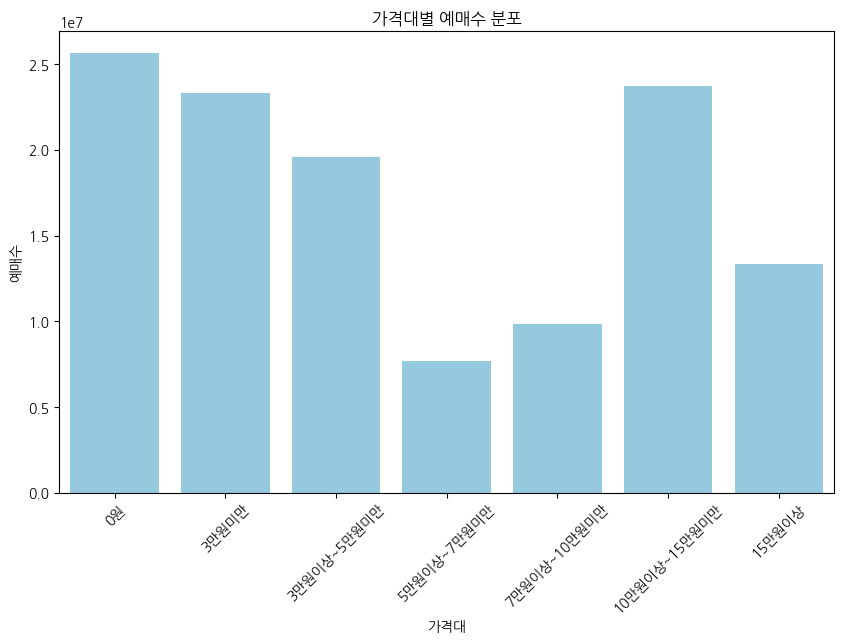

In [168]:
fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(data=price_summary, x="가격대", y="예매수", ax=ax1, color="skyblue")
ax1.set_ylabel("예매수")
ax1.set_title("가격대별 예매수 분포")

plt.xticks(rotation=45)
plt.show()

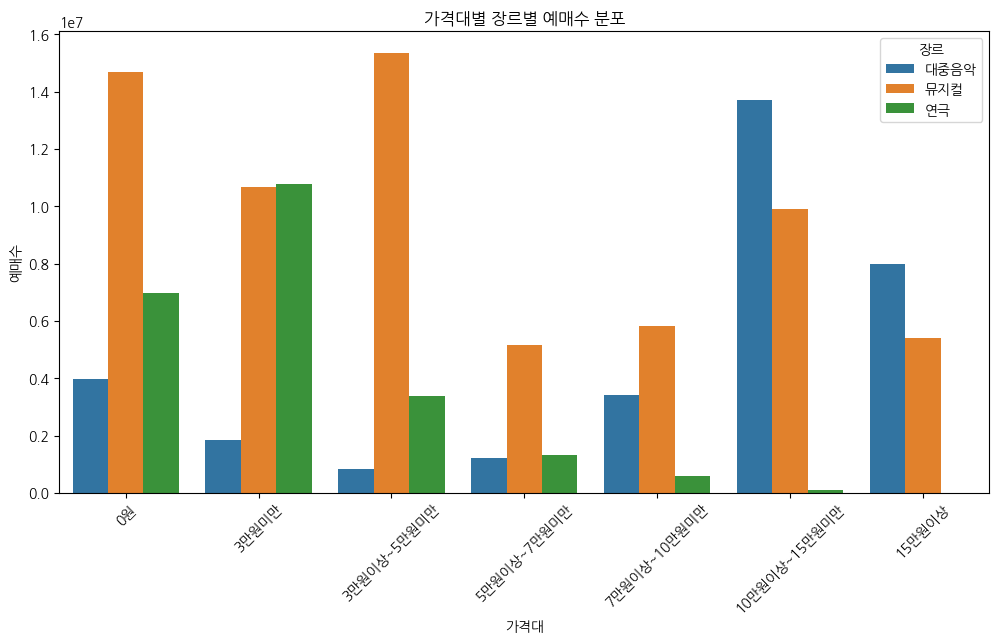

In [177]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=price_stats_df,
    x="가격대",
    y="예매수",
    hue="장르",
    estimator=sum,   # 합계 기준
    errorbar=None
)

plt.title("가격대별 장르별 예매수 분포")
plt.ylabel("예매수")
plt.xlabel("가격대")
plt.xticks(rotation=45)
plt.legend(title="장르")
plt.show()


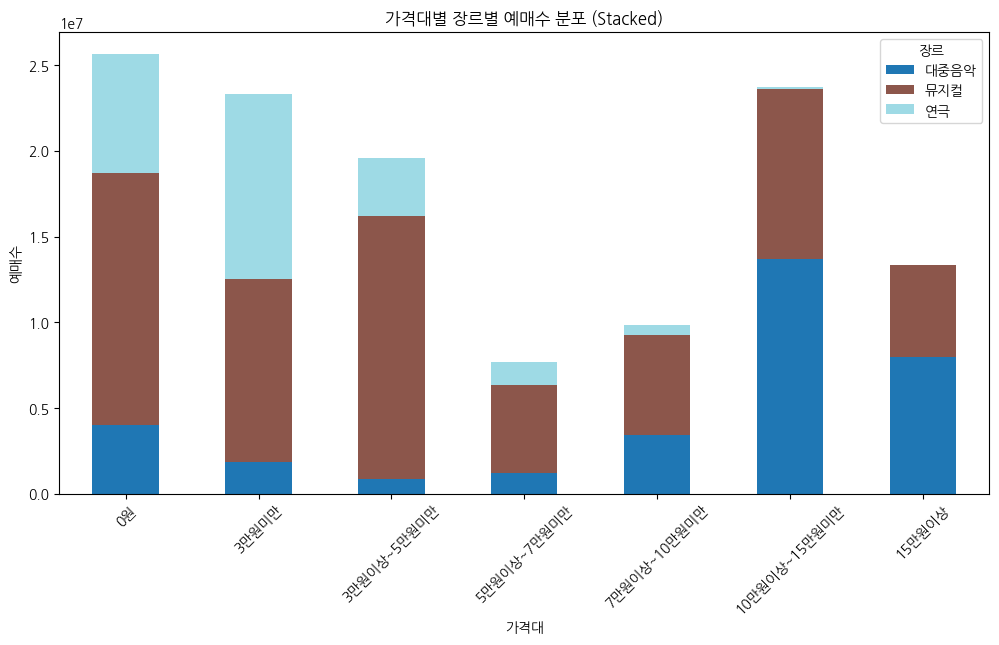

In [183]:
# pivot: 가격대 × 장르별 예매수 합계
price_stats_df["가격대"] = pd.Categorical(
    price_stats_df["가격대"], 
    categories=order, 
    ordered=True
)

pivot_df = price_stats_df.pivot_table(
    index="가격대", 
    columns="장르", 
    values="예매수", 
    aggfunc="sum", 
    fill_value=0
)
# stacked bar chart
pivot_df.plot(
    kind="bar", 
    stacked=True, 
    figsize=(12,6),
    colormap="tab20"   # 색상 팔레트
)

plt.title("가격대별 장르별 예매수 분포 (Stacked)")
plt.ylabel("예매수")
plt.xlabel("가격대")
plt.xticks(rotation=45)
plt.legend(title="장르")
plt.show()


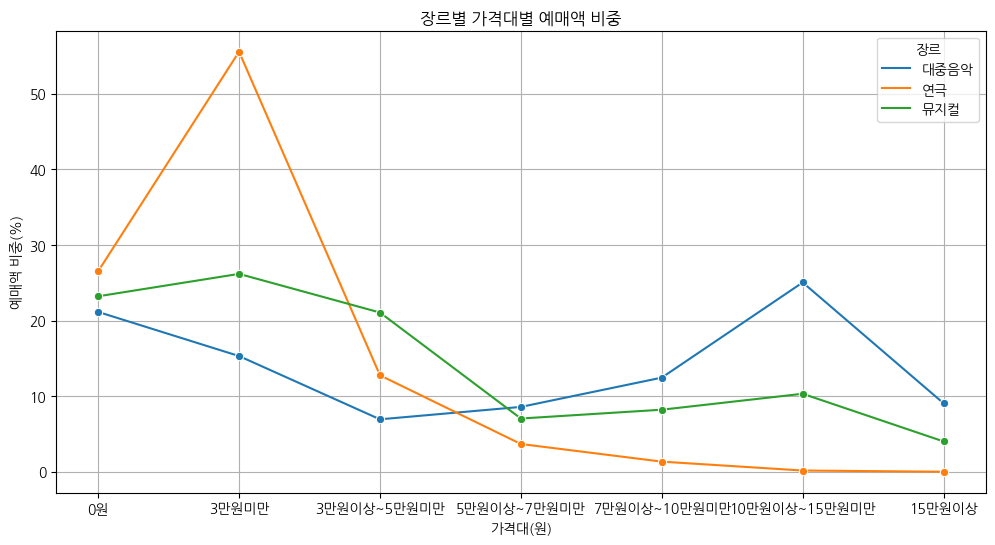

In [ ]:
# 장르별 가격대 예매액 비중 평균
# 매출 비중 -> 고가 티켓 위 주 공연이 유리
genre_price = price_stats_df.groupby(["장르","가격대"])["예매액비중"].mean().reset_index()

genre_price["가격대"] = pd.Categorical(genre_price["가격대"], categories=order, ordered=True)

genre_price = genre_price.sort_values("가격대")

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_price, x="가격대", y="예매액비중", hue="장르", marker="o")
plt.title("장르별 가격대별 예매액 비중")
plt.ylabel("예매액 비중(%)")
plt.xlabel("가격대(원)")
plt.grid(True)
plt.show()


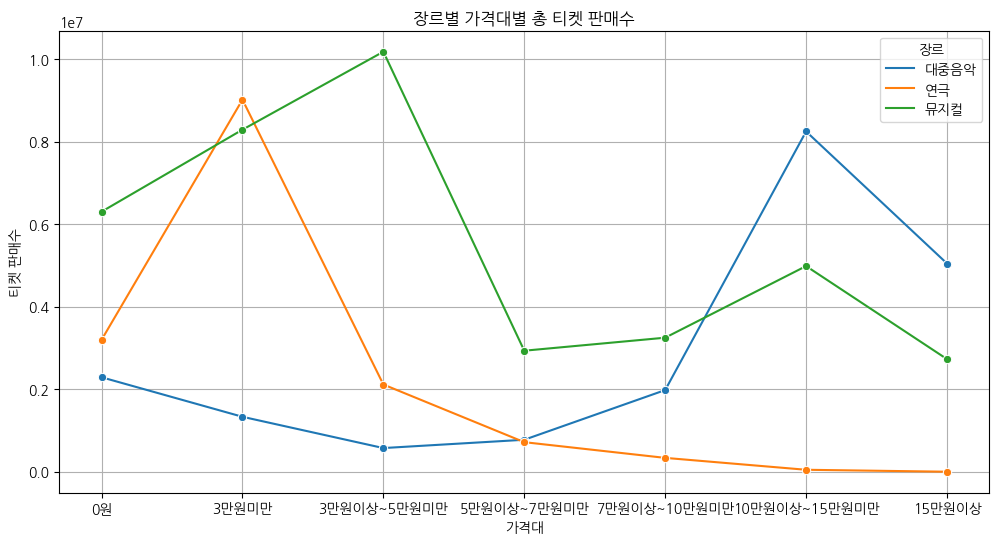

In [176]:
# 장르별 가격대 총티켓판매수 합계
# 얼마짜리 표가 실제로 많이 팔렸는지 -> 수요 중심

genre_tickets = price_stats_df.groupby(["장르","가격대"])["총티켓판매수"].sum().reset_index()

genre_tickets["가격대"] = pd.Categorical(genre_tickets["가격대"], categories=order, ordered=True)

genre_tickets = genre_tickets.sort_values("가격대")

plt.figure(figsize=(12,6))
sns.lineplot(
    data=genre_tickets,
    x="가격대",
    y="총티켓판매수",
    hue="장르",
    marker="o"
)
plt.title("장르별 가격대별 총 티켓 판매수")
plt.ylabel("티켓 판매수")
plt.xlabel("가격대")
plt.grid(True)
plt.show()


In [171]:
price_stats_df.columns

Index(['장르', '예매액', '예매수', '총티켓판매수', '취소수', '예매액비중', '가격대', 'year', 'month',
       'shcate'],
      dtype='object')

In [184]:
df.columns

Index(['공연ID', '공연명', '공연시작일', '공연종료일', '공연시설명', '출연진', '제작진', '런타임', '관람연령',
       '제작사', '기획사', '주최', '주관', '티켓가격', '포스터URL', '줄거리', '공연지역', '공연장르명',
       '오픈런', '내한여부', '아동공연여부', '대학로공연여부', '축제여부', '뮤지컬라이센스', '뮤지컬창작', '최종수정일',
       '공연상태', '공연시설ID', '공연시간', '장르(통계)', '상연횟수', '공연명(통계)', '공연시설명(통계)',
       '공연시작일(통계)', '공연종료일(통계)', '연도(통계)', '월(통계)', '장르코드(통계)', '티켓가격_list',
       '최소가격', '최대가격', '공연시작연도', '뮤지컬_구분'],
      dtype='object')

In [191]:
facility_df.columns

Index(['공연시설ID', '공연시설명', '공연장수', '시설특성', '개관연도', '객석수', '전화번호', '홈페이지', '주소',
       '위도', '경도', '레스토랑여부', '카페여부', '편의점여부', '놀이방여부', '수유실여부', '장애시설_주차장',
       '장애시설_화장실', '장애시설_경사로', '장애시설_엘리베이터', '주차시설여부', 'mt13s', 'returncode',
       'errmsg', 'responsetime', '시군구', '시도'],
      dtype='object')

In [205]:
df = df.merge(
    facility_df[['공연시설ID', '객석수', '시도', '시군구']],
    how='left',
    on='공연시설ID'
)

In [206]:
def classify_performance(row):
    if ((row['뮤지컬라이센스']=="N") and (row['뮤지컬창작']=="Y")) or (row['대학로공연여부']=="Y") or (row['객석수']<1000):
        return "중소규모"
    elif (row['객석수']>=1000) or (row['뮤지컬라이센스']=="Y") or (row['내한여부']=="Y"):
        return "대형"
    else:
        return "기타"

df['공연규모'] = df.apply(classify_performance, axis=1)

In [209]:
df.columns

Index(['공연ID', '공연명', '공연시작일', '공연종료일', '공연시설명', '출연진', '제작진', '런타임', '관람연령',
       '제작사', '기획사', '주최', '주관', '티켓가격', '포스터URL', '줄거리', '공연지역', '공연장르명',
       '오픈런', '내한여부', '아동공연여부', '대학로공연여부', '축제여부', '뮤지컬라이센스', '뮤지컬창작', '최종수정일',
       '공연상태', '공연시설ID', '공연시간', '장르(통계)', '상연횟수', '공연명(통계)', '공연시설명(통계)',
       '공연시작일(통계)', '공연종료일(통계)', '연도(통계)', '월(통계)', '장르코드(통계)', '티켓가격_list',
       '최소가격', '최대가격', '공연시작연도', '뮤지컬_구분', '공연규모', '객석수', '시도', '시군구'],
      dtype='object')

In [212]:
df['최대가격'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 35415 entries, 0 to 35414
Series name: 최대가격
Non-Null Count  Dtype  
--------------  -----  
33217 non-null  float64
dtypes: float64(1)
memory usage: 276.8 KB


In [213]:
import pandas as pd

# 가격대 분류 함수
def price_bin(x):
    if x == 0:
        return "0원"
    elif x < 30000:
        return "3만원미만"
    elif x < 50000:
        return "3만원이상~5만원미만"
    elif x < 70000:
        return "5만원이상~7만원미만"
    elif x < 100000:
        return "7만원이상~10만원미만"
    elif x < 150000:
        return "10만원이상~15만원미만"
    else:
        return "15만원이상"

# 새로운 가격대 컬럼 생성
df["가격대"] = df["최대가격"].apply(price_bin)

# 카테고리 순서 지정
order = [
    "0원",
    "3만원미만",
    "3만원이상~5만원미만",
    "5만원이상~7만원미만",
    "7만원이상~10만원미만",
    "10만원이상~15만원미만",
    "15만원이상"
]
df["가격대"] = pd.Categorical(df["가격대"], categories=order, ordered=True)

In [231]:
sido_sigungus = df[['시도', '시군구']].drop_duplicates()

In [232]:
region_price_dist = (
    df.groupby(["시도", "시군구", "공연규모", "가격대"])
    .size()
    .reset_index(name="공연수")
)

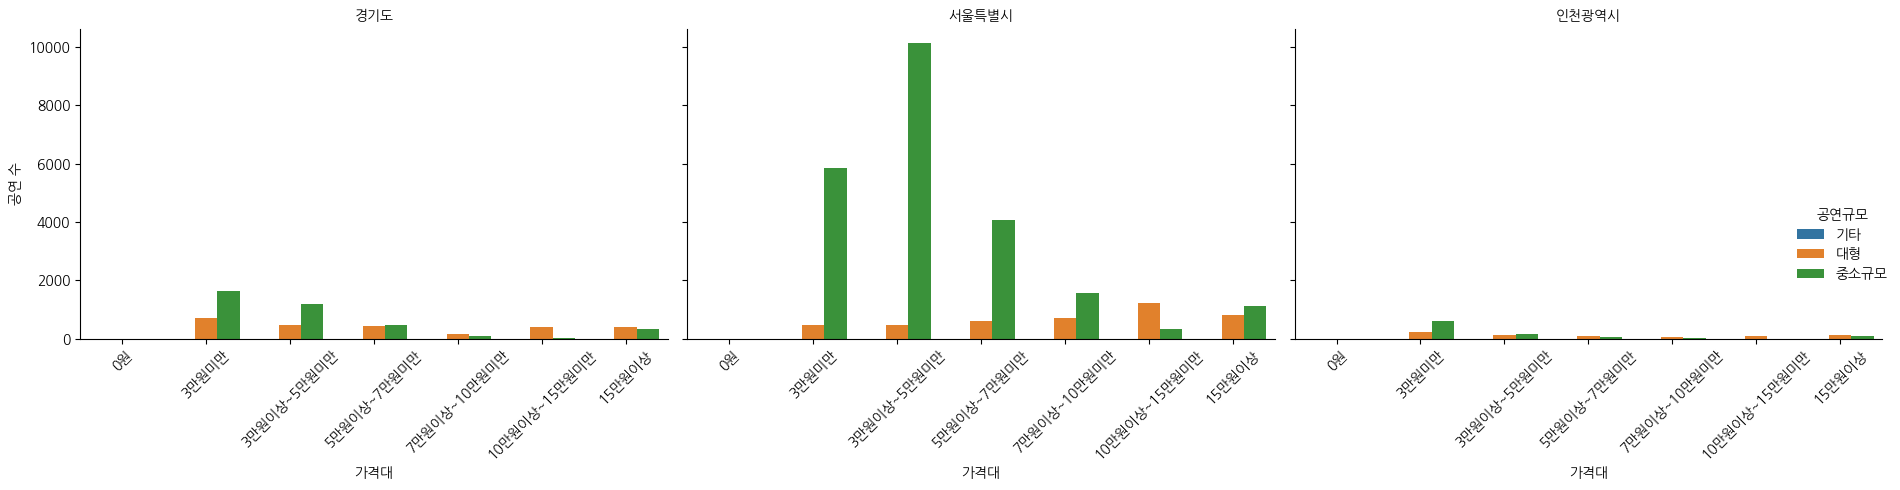

In [229]:
# 시각화: 시도별 Facet Grid
g = sns.catplot(
    data=region_price_dist,
    x="가격대",
    y="공연수",
    hue="공연규모",
    col="시도",
    kind="bar",
    height=5,
    aspect=1.2,
    ci=None
)

g.set_titles("{col_name}")
g.set_axis_labels("가격대", "공연 수")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()